<a href="https://colab.research.google.com/github/anand1994sp/AutoSAVE/blob/main/keras_to_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

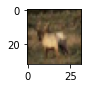

In [10]:
plot_sample(3)

In [24]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [13]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [14]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')   
])

In [21]:

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [25]:
model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 10s 5ms/step - loss: 1.8942 - accuracy: 0.3227


In [27]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 [==============================] - 1s 3ms/step


3

In [28]:
y_test[0]

array([3], dtype=uint8)

In [29]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [31]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 91s 58ms/step - loss: 1.8093 - accuracy: 0.3553
1min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.8098 - accuracy: 0.3569
7.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8103 - accuracy: 0.3536
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6206 - accuracy: 0.4275
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5397 - accuracy: 0.4546
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4785 - accuracy: 0.4778
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4331 - accuracy: 0.4948
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3888 - accuracy: 0.5117
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3533 - accuracy: 0.5222
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3160 - accuracy: 0.5360
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2828 - accuracy: 0.5503
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.252